In [ ]:
#根据数据分析与可视化的步骤，自拟题目，寻找数据，对某个主题进行研究，并提出至少三个相关问题进行数据分析，并将结果进行可视化展示。
'''
1. 评论高频词汇分析
2. 点赞数量分析
3. 回复评论数量分析
'''

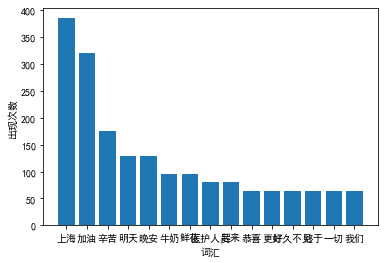

In [49]:
import jieba as jb
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

jb.setLogLevel(jb.logging.INFO)
def data_process():
    def comment_get(comments):
        content = re.sub(r"</?(.+?)>", "", comments) # 去除标签
        comment = re.sub(r"\s+", "", content)  # 去除空白字符
        return comment

    # 读取文件excel
    pf = pd.read_excel("weibo_comments.xls")
    pf["评论内容"] = pf["评论内容"].str.replace(r'[^\u4e00-\u9fa5]', '')
    # 获取所有评论内容
    comment_df = pd.DataFrame(pf["评论内容"])
    # 处理所有评论将附带的html标签样式删除
    comment_df = comment_df["评论内容"].map(comment_get)

    comment_ls = comment_df.to_list()
    txt = ""
    for comment_st in comment_ls:
        txt += comment_st
    txt = jb.lcut(txt)
    d = {}
    for i in txt:
        if len(i) == 1:
            continue
        else:
            d[i] = d.get(i, 0) + 1
    ls1 = list(d.items())
    ls1.sort(key=lambda x: x[1], reverse=True)

    dls = []
    nls = []
    for data in ls1:
        dls.append(data[0])
        nls.append(data[1])
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.bar(range(len(dls[0:15])),nls[0:15],tick_label=dls[0:15])
    plt.xlabel("词汇")
    plt.ylabel("出现次数")

    plt.show()
    plt.close()
data_process()

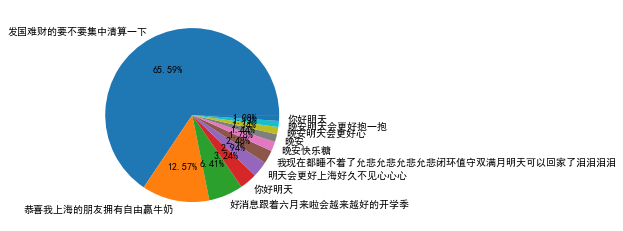

In [52]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pf = pd.read_excel("weibo_comments.xls")

pf.set_index("点赞数")
all = 0
for ave in pf["点赞数"]:
    if ave < 200 :
        break
    all += ave
name = []
num = []
for date in pf["点赞数"]:
    if date < 200 :
        break
    num.append(date/all)
pf["评论内容"] = pf["评论内容"].str.replace(r'[^\u4e00-\u9fa5]', '')
for date in pf["评论内容"]:
    if len(name) == len(num):
        break
    content = re.sub(r"</?(.+?)>", "", date) # 去除标签
    date = re.sub(r"\s+", "", content)  # 去除空白字符
    name.append(date)
plt.pie(num,labels=name,autopct='%1.2f%%')
plt.show()

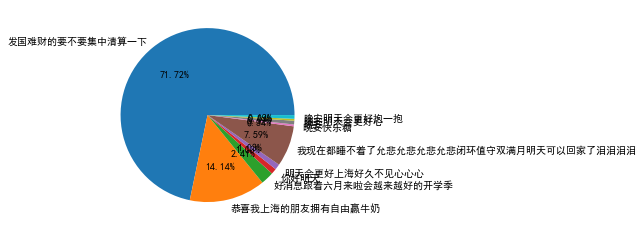

In [46]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pf = pd.read_excel("weibo_comments.xls")
pf.set_index("回复数")
all = 0
for ave in pf["回复数"]:
    if ave < 1 :
        break
    all += ave
name = []
num = []
pf["评论内容"] = pf["评论内容"].str.replace(r'[^\u4e00-\u9fa5]', '')
for date in pf["回复数"]:
    if date < 1 :
        break
    num.append(date/all)
for date in pf["评论内容"]:
    if len(name) == len(num):
        break
    content = re.sub(r"</?(.+?)>", "", date) # 去除标签
    date = re.sub(r"\s+", "", content)  # 去除空白字符
    name.append(date)

plt.pie(num,labels=name,autopct='%1.2f%%')
plt.show()

In [ ]:
#遇到的问题及解决方法
'''
在作业过程中，我发现数据获取过程很难，导出微博评论数据量繁杂，通过不断查询更正才导出表格。除此之外，在分析评论回复数量的时候，评论中带有特殊的emoji表情，无法显示，总是Warning，我通过查找python中怎么显示表情找到相关解决方法，才顺利解决问题。
'''